In [1]:
import openmc

MT disponibles : dict_keys([502, 504, 515, 517, 522, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543])


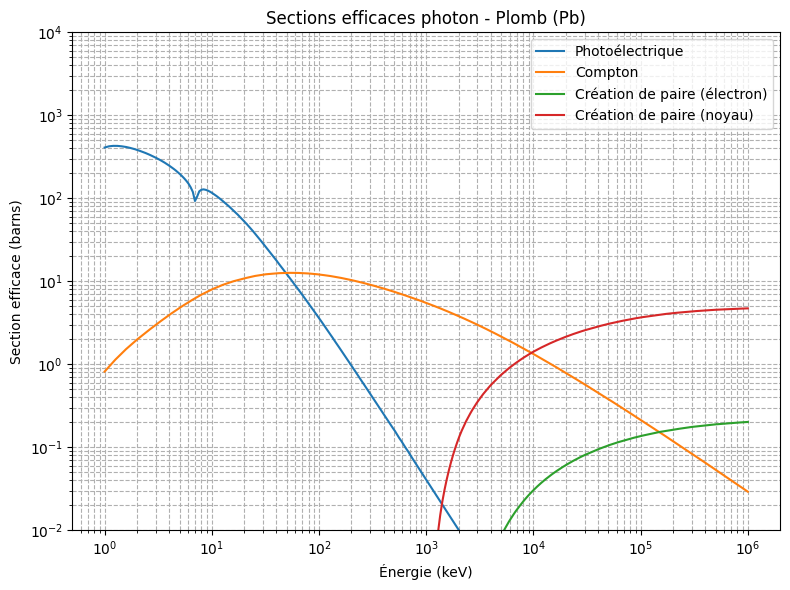

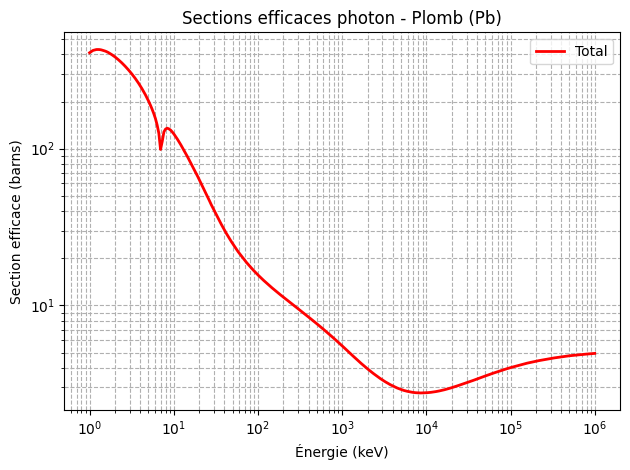

In [ ]:
import openmc.data
import numpy as np
import matplotlib.pyplot as plt

# Charger fichier HDF5
element = 'Pb'
PATH_TO_HDF5 = f"/Users/simonfoucambert/Documents/projects/open-mc-project/lib/cross_sections/photon/{element}.h5"
photoatom = openmc.data.IncidentPhoton.from_hdf5(PATH_TO_HDF5)

# Afficher les MT disponibles
print("MT disponibles :", photoatom.reactions.keys())

# Énergies
energies = np.logspace(3, 9, 300) # from 1 keV to 1e6 keV

# Initialisation du tracé
plt.figure(figsize=(8, 6))

# Fonction utilitaire pour tracer une section si elle existe
def tracer_cs(mt, label):
    if mt in photoatom.reactions:
        cs = photoatom.reactions[mt].xs(energies)
        plt.loglog(energies / 1000, cs, label=label)
    else:
        print(f"[Info] Réaction {label} (MT={mt}) non trouvée.")

# Tracer ce qui est dispo
tracer_cs(502, 'Photoélectrique')
tracer_cs(504, 'Compton')
tracer_cs(515, 'Création de paire (électron)')
tracer_cs(517, 'Création de paire (noyau)')

def trace_total_xs():
    mts = [502, 504, 515, 517]
    cs_sum = np.zeros_like(energies)
    found = False
    for mt in mts:
        if mt in photoatom.reactions:
            cs_sum += photoatom.reactions[mt].xs(energies)
            found = True
    if found:
        plt.loglog(energies / 1000, cs_sum, label='Total', color='red', linewidth=2, linestyle='-')
    else:
        print("[Info] Aucune des réactions demandées n'a été trouvée.")


# Finaliser le graphique
plt.xlabel("Énergie (keV)")
plt.ylabel("Section efficace (barns)")
plt.title("Sections efficaces photon - Plomb (Pb)")
# plt.xlim(2.5e6, 1e8)
plt.ylim(1e-2, 1e4)
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()


# Exemple d'utilisation :
trace_total_xs()
plt.xlabel("Énergie (keV)")
plt.ylabel("Section efficace (barns)")
plt.title("Sections efficaces photon - Plomb (Pb)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()


In [ ]:
element = 'Pb'
PATH_TO_HDF5 = f"/Users/simonfoucambert/Documents/projects/open-mc-project/lib/cross_sections/photon/{element}.h5"
photoatom = openmc.data.IncidentPhoton.from_hdf5(PATH_TO_HDF5)

def path_to_hdf5(element):
    """
    Retourne le chemin vers le fichier HDF5 pour un élément donné.
    """
    return f"/Users/simonfoucambert/Documents/projects/open-mc-project/lib/cross_sections/photon/{element}.h5"


def get_xs_for_mt(element, mt, energy):
    """
    Récupère la section efficace pour un MT donné.
    """
    photoatom = openmc.data.IncidentPhoton.from_hdf5(path_to_hdf5(element))
    if mt in photoatom.reactions:
        return photoatom.reactions[mt].xs(energy)
    else:
        print(f"[Info] Réaction MT={mt} non trouvée.")
        return None

def get_total_xs(element, energies):
    """
    Récupère la section efficace totale pour un élément donné.
    """
    photoatom = openmc.data.IncidentPhoton.from_hdf5(path_to_hdf5(element))
    mts = [502, 504, 515, 517]
    cs_sum = np.zeros_like(energies)
    found = False
    for mt in mts:
        if mt in photoatom.reactions:
            cs_sum += photoatom.reactions[mt].xs(energies)
            found = True
    if found:
        return cs_sum
    else:
        print("[Info] Aucune des réactions demandées n'a été trouvée.")
        return None

print(get_xs_for_mt("Pb", 502, 1e6))  # Exemple pour MT=502 à 1 MeV

print(get_total_xs("Pb", 1e6))

0.956686445
18.115686444999998


A FAIRE : METTRE LES FONCTIONS DANS UNE BIBLIOTHEQUE 